<img hfre>

# Data Dictionary
Area = dict_area_categories_numeric = {"Area":{'Urban':0, 'Suburban':1, 'Rural':2}}

# Part I: Research Question
<br><br>

## A.  Describe one question or decision that you will address using the data set you chose. The summarized question or decision must be relevant to a realistic organizational need or situation.
<br><br>
### **How do we identify customers that might churn?**
<br><br>


## B.  Describe the variables in the data set and indicate the specific type of data being described. Use examples from the data set that support your claims.
<br><br>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline
# %matplotlib notebook

In [48]:
df = pd.read_csv('churn_raw_data.csv')

In [49]:
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


In [50]:
df.shape

(10000, 52)

In [51]:
df.columns

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8'],
      dtype='object')

In [52]:
## add comment
pd.set_option('display.max_columns', None)

print(df)

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1              2          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2              3          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3              4          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4              5          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...          ...        ...         ...                                   ...   
9995        9996       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996        9997       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997        9998       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998        9999       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999       10000      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

              City State   

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

<img src="data_dictionary_1.png" width="750" height="750">
<img src="data_dictionary_2.png" width="750" height="750">
<img src="data_dictionary_3.png" width="750" height="750">

In [54]:
# Run this code for every data type to verify the data type
type(df.loc[2,'Unnamed: 0'])

numpy.int64

 **Unnamed:** Is an int that is a 1 based index that I intend to change to a zero based index.
 
 **CaseOrder:** Is an int that preserves the order of the original file.              
 
 **Customer_id:** Is an string that contains letters and numbers that is a unique identifier.   
 
 
 **Interaction:** Is an string that is a unique id that is related to customer interactions with the company through transactions, technical support and customer sign up.            
 
 **City:** Is a string that contains the customers city of residence that is listed on the billing statement. Categorical.                 
 
 **State:** Is a string that contains the customers state of residence that is listed on the billing statement. Categorical.                
 
 **County:** Is a string that contains the customers state of residence that is listed on the billing statement. Categorical.               
 
 **Zip:** Is an int that contains the customers zip code of residence that is listed on the billing statement. Categorical.                  
 
 **Lat:** Is an int that lists the latitude of the customers residence that is listed on the billing statement. Categorical.
 
 **Lng:** Is an int that lists the longitude of the customers residence that is listed on the billing statement. Categorical.                  
 
 **Population:** Is an int that lists the population within a mile radius based on census data. Quantitative.
 
 
 **Area:**  Is a string that describes the area type based on census data. Either rural, urban or suburban. Categorical.
 
 **Timezone:** Is a strong of the time zone of the customer based on sign up information. Categorical.             
 
 **Job:** Is a string that represents the employment of the person being invoiced at sign up time. Categorical. 
 
 
 **Children:** Is an integer that represents the number of children in the household at the time of signup. Categorical.       
 
 **Age:** An int that represents the age of the customer at signup. Categorical.
 
 **Education:** A string of the highest degree the customer had earned at signup. Categorical.
 
 **Employment:** A string of the customers employment status at the time of signup. Categorical.            
 
 **Income:** An int representing the income of the customer at signup. Categorical.              
 
 **Marital:**  A string representing the marital status of the customer at signup. Categorical.              
 
 **Gender:**   A string representing the gender of the customer. Either male, female or non-binary. Categorical.             
 **Churn:** A string representing whether the customer has discontinued service within the last month. Categorical.
 
 **Outage_sec_perweek:** An int representing the number of seconds per week of system outages in the customers neighborhood.    
 
 **Email:** An int representing the number of emails sent to the customer in the last year via marketing or correspondence.                
 
 **Contacts:** An int representing the times a customer contacted customer support.             
 
 **Yearly_equip_failure:**  An int representing the number of times customers equipment failed and needed to be reset or replaced.
 
 **Techie:** Whether the customer considers themselves technically inclined per survey when they signed up. Categorical.       
 
 **Contract:** A string representing the term of the contract. Month-month, one-year and two-year. Categorical. 
 
 
 **Port_modem:** A string representing whether the customer has a portable modem or not. Categorical.            
 
 **Tablet:** A string representing whether the customer has a portable modem or not. Categorical.                
 
 **InternetService:** A string representing the customers type of internet service. DSL, fiber optic or none. Categorical.     
 
 **Phone:** A string representing whether the customer has a phone or not. Categorical.                 
 
 **Multiple:** A string representing whether the customer has multiple lines or not.Categorical.              
 
 **OnlineSecurity:** A string representing whether the customer has online security add-on. Categorical.        
 
 **OnlineBackup:** A string representing whether the customer has an online back-up add-on. Categorical.          
 
 **DeviceProtection:** A string representing whether the customer has device protection add-on. Categorical.      
 
 **TechSupport:** A string representing whether the customer has technical support add-on. Categorical.           
 
 **StreamingTV:** A string representing whether the customer has streaming TV. Categorical.           
 
 **StreamingMovies:** A string representing whether the customer has streaming movies. Categorical.
 
 **PaperlessBilling:**  A string representing whether the customer has paperless billing. Categorical.    
 
 **PaymentMethod:** A string representing the customers payment method and whether it is automatic or not. Categorical.         
 
 **Tenure:** An int representing the number of months the customer has stayed with the provider.                
 
 **MonthlyCharge:** An int that is the average monthly bill the customer receives.         
 
 **Bandwidth_GB_Year:** An int that represents the average GB used per year by the customer.   
 
 ### Eight question customer survey 1 being most important and 8 being least important
 
 **item1:** Timely responses                 
 
 **item2:** Timely Fixes                 
 
 **item3:** Timely Replacements                 
 
 **item4:** Reliability                  
 
 **item5:** Options                 
 
 **item6:** Respectful response                 
 
 **item7:** Courteous exchange                 
 
 **item8:** Evidence of active listening                
 

### Notes on Data:
#### Timezone is data based on sign up whereas other variables are based on the billing statement.
#### Analyzing customers who consider themselves techies and the amount of contacts to customer support.
#### Exploring issues with equipment and their effect on churn.
#### Exploring average amount of bill and its effect on churn.
#### Exploring average amount of bill, add-ons, and income/employment and its effect on churn.
#### Payment method used and its effect on churn.
#### The amount of contact that the company has with the customer and its effect on churn.
#### Analyzing the survey and the level of importance on the interaction with customer service and its effect on churn as well as how many times the customer has been in contact with the company. Might give insight to the level of customer service that customers are receiving.

# Part II: Data-Cleaning Plan
<br><br>

## C.  Explain the plan for cleaning the data by doing the following:


1.  Propose a plan that includes the relevant techniques and specific steps needed to identify anomalies in the data set.
<ul>
    <li>Changing 'unnamed' from a 1 based index to a zero based index and renaming it 'index'.
</li>
    <li>Changing misleading field value
</li>
    <li>Chang NaN values to the Median of the column.</li>
    <li>Re-expressing categorical data as numeric data
</li>
    <li>Standardizing the numeric fields
</li>
    <li>Identifying outliers
</li>
</ul>



<br><br>

2.  Justify your approach for assessing the quality of the data, include:
<p>Characteristics of the data being assessed</p>
<ul>
    <li>Completeness</li>
    <li>Validity</li>
    <li>Consistency</li>
    <li>Integrity</li>
    <li>Unique</li>
</ul>
<p>The completeness of the data. It not having missing values or incorrect data.</p>
<p>The validity of the data. The data is formatted correctly and the data is accurate.</p>
<p>The data is consistent in the ways that it is labeled and represented in a uniform way.</p>
<p>The data is correctly associated with other data that represents the proper meaning </p>
<p>All data is able to be identified and associated with the correct unique source</p>
<p>The data can be attached to a unique index that is associated with the relevant data and a unique customer id. After that the misleading fields values are renamed and replaced with values that are easily understood and relevant to the field. Next re-expressing categorical data as numeric data will allow us to assign meaning and context to data that would otherwise not be as usable. I will need to be careful to accurately re-express the data so as to not corrupt the data. Next standardizing the numeric fields will allow the data to be associated with a numeric value that indicates how many standard deviations the data is away from the mean of the data. With the standardization of the numeric fields I will be able to accurately identify outliers by determining their distance from the mean as well as the number of standard deviations away from the mean.</p>
<br><br>  

3.  Justify your selected programming language and any libraries and packages that will support the data-cleaning process.
#### Python with Pandas, Numpy, matplotlib.pyplot and using the magic inline code for graphs and plots.
##### I chose Python as I am already somewhat knowledgeable with python as it pertains to data science and it is a very good generalist language that has a ton of tools and support for data science and analytics through its libraries, packages and modules. It has a vast community that is active and always helpful whenever help is needed. There are thousands of resources for Python and data analytics should a problem arise that I do not know how to solve. 

<br>
<br>



4.  Provide the code you will use to identify the anomalies in the data.

<br><br>

## Changing unnamed to 'index' and making it a zero based index.

In [55]:
df.rename(columns={('Unnamed: 0'): ('Index')}, inplace=True)
df.columns[0]

'Index'

In [56]:
df.shape

(10000, 52)

In [57]:
df.Index = pd.Series(range(0,10000))

In [58]:
df.Index.head()

0    0
1    1
2    2
3    3
4    4
Name: Index, dtype: int64

In [59]:
df.head()

,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


## Changing misleading field values

In [60]:
all_columns = list(df.columns)
for column in all_columns:
    print(column, len(df[column].unique()))

Index 10000
CaseOrder 10000
Customer_id 10000
Interaction 10000
City 6058
State 52
County 1620
Zip 8583
Lat 8563
Lng 8655
Population 5933
Area 3
Timezone 25
Job 639
Children 12
Age 73
Education 12
Employment 5
Income 7507
Marital 5
Gender 3
Churn 2
Outage_sec_perweek 9993
Email 23
Contacts 8
Yearly_equip_failure 6
Techie 3
Contract 3
Port_modem 2
Tablet 2
InternetService 3
Phone 3
Multiple 2
OnlineSecurity 2
OnlineBackup 2
DeviceProtection 2
TechSupport 3
StreamingTV 2
StreamingMovies 2
PaperlessBilling 2
PaymentMethod 4
Tenure 9066
MonthlyCharge 9984
Bandwidth_GB_Year 8973
item1 7
item2 7
item3 8
item4 7
item5 7
item6 8
item7 7
item8 8


## List of data that has to many unique values
### State has 52 but DC and PR are listed, not going to change.
### Timezone has 25 unique values even though there are only six time zones in the USA.
### Children has 12 different values
### Education has 12 values
### Employment has 5 values
### Marital status has 5 values 
### Techie has 3 where yes or no would suffice
### Internet service has 3 values where yes or no would suffice
### Phone has 3 values where yes or no would suffice
### Techsupport has 3 values where yes or no would suffice


In [61]:
misleading_values_list = ['Area','Timezone','Children','Education','Employment','Marital','Techie','InternetService','Phone','TechSupport']

In [62]:
for value in misleading_values_list:
    print(df[value].unique())

['Urban' 'Suburban' 'Rural']
['America/Sitka' 'America/Detroit' 'America/Los_Angeles' 'America/Chicago'
 'America/New_York' 'America/Puerto_Rico' 'America/Denver'
 'America/Menominee' 'America/Phoenix' 'America/Indiana/Indianapolis'
 'America/Boise' 'America/Kentucky/Louisville' 'Pacific/Honolulu'
 'America/Indiana/Petersburg' 'America/Nome' 'America/Anchorage'
 'America/Indiana/Knox' 'America/Juneau' 'America/Toronto'
 'America/Indiana/Winamac' 'America/Indiana/Vincennes'
 'America/North_Dakota/New_Salem' 'America/Indiana/Tell_City'
 'America/Indiana/Marengo' 'America/Ojinaga']
[nan  1.  4.  0.  3.  2.  7.  5.  9.  6. 10.  8.]
["Master's Degree" 'Regular High School Diploma' 'Doctorate Degree'
 'No Schooling Completed' "Associate's Degree" "Bachelor's Degree"
 'Some College, Less than 1 Year' 'GED or Alternative Credential'
 'Some College, 1 or More Years, No Degree'
 '9th Grade to 12th Grade, No Diploma' 'Nursery School to 8th Grade'
 'Professional School Degree']
['Part Time' 'Retir

In [63]:
# checks the data frame for NaN and returns the total per column
df.isna().sum(axis=0)

Index                      0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

## Tried replacing NaN with mean of column.
#### The result was not desirable. It inflated the mean drastically and was susceptible to outliers, I then decided to remove the NaN from the dataframe. Which reduced the amount of rows by almost 3/4. This was also undesirable. I finally decided on imputing the mean of the column as it is not affected by outliers and is a better indicator of central tendency.
#### cite this here https://www.freecodecamp.org/news/the-penalty-of-missing-values-in-data-science-91b756f95a32/

In [64]:
# will replace NaN values with the mean of the column
# df.fillna(df.mean(), inplace=True)

In [65]:
# df['Children'].plot(kind='hist', bins=12, xticks=range(0,12), title='Histogram of Number of Children.')
# df.Age.plot(kind='hist', bins=10, title='Histogram of Age.')
# # df_dropped_NaN = df.dropna()
# df_dropped_NaN['Children'].plot(kind='hist', bins=12, xticks=range(0,12), title='Histogram of Number of Children with NaN values converted to the columns mean.')
# df_dropped_NaN['Age'].plot(kind='hist', bins=10, title='Histogram of Age after NaN has been removed')
# len(df_dropped_NaN.isna().sum(axis=0))
# df_dropped_NaN.shape
# df_dropped_NaN.isna().sum(axis=0)

In [66]:
df.fillna(df.median(), inplace=True)

## Replacing NaN in columns with Median of column

<AxesSubplot:title={'center':'Histogram of Number of Children.'}, ylabel='Frequency'>

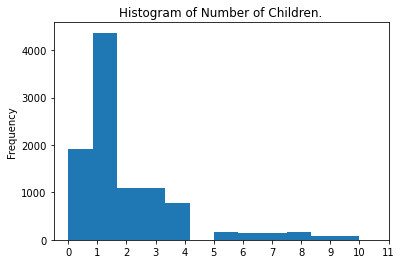

In [67]:
df['Children'].plot(kind='hist', bins=12, xticks=range(0,12), title='Histogram of Number of Children.')

<AxesSubplot:title={'center':'Histogram of Age.'}, ylabel='Frequency'>

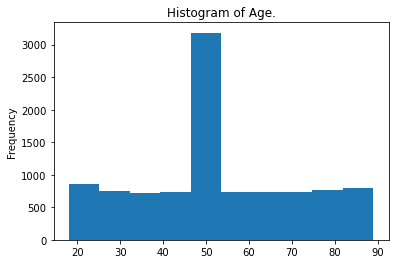

In [68]:
df.Age.plot(kind='hist', bins=10, title='Histogram of Age.')

# Replacing time zones by longitude.

# The timezones are valid and to change to six time zones does not seem worth the effort to change to 


## The rest of the variables seem to be fine once converting the NaN to median in the 8 columns.

# Re-expressing the values of columns as numeric that have only yes no responses or categorical responses that cane be re-expressed

In [69]:
list_of_yes_no_columns = ['Churn',
'Area',
'Education',
'Marital',
'Gender',
'Contract',
'Techie',
'Port_modem',
'Tablet',
'InternetService',
'Phone',
'Multiple',
'OnlineSecurity',
'OnlineBackup',
'DeviceProtection',
'TechSupport',
'StreamingTV',
'StreamingMovies', 
'PaperlessBilling']

# Area

In [70]:
dict_area_categories_numeric = {"Area":{'Urban':0, 'Suburban':1, 'Rural':2}}

In [71]:
df.replace(dict_area_categories_numeric, inplace=True)

In [72]:
df.Area.unique()

array([0, 1, 2])

# Education

In [73]:
dict_education_categories_numeric = {'Education': {
    'Doctorate Degree':22,
    "Master's Degree":19,
    "Bachelor's Degree":16,
    "Associate's Degree":14, 
    'Some College, 1 or More Years, No Degree':13,
    'Some College, Less than 1 Year':13,
    'Professional School Degree':12, 
    'Regular High School Diploma':12,
    'GED or Alternative Credential':10,
    '9th Grade to 12th Grade, No Diploma':10,
    'Nursery School to 8th Grade':8,
    'No Schooling Completed':0, 
}}

# Part III: Data Cleaning

## D.  Summarize the data-cleaning process by doing the following:

1.  Describe the findings, including all anomalies, from the implementation of the data-cleaning plan from part C.

2.  Justify your methods for mitigating each type of discovered anomaly in the data set.

3.  Summarize the outcome from the implementation of each data-cleaning step.

4.  Provide the code used to mitigate anomalies.

5.  Provide a copy of the cleaned data set.

6.  Summarize the limitations of the data-cleaning process.

7.  Discuss how the limitations in part D6 affect the analysis of the question or decision from part A.

## E.  Apply principal component analysis (PCA) to identify the significant features of the data set by doing the following:

1.  List the principal components in the data set.

2.  Describe how you identified the principal components of the data set.

3.  Describe how the organization can benefit from the results of the PCA

# Part IV. Supporting Documents

## F.  Provide a Panopto recording that demonstrates the warning- and error-free functionality of the code used to support the discovery of anomalies and the data cleaning process and summarizes the programming environment.
 

Note: For instructions on how to access and use Panopto, use the "Panopto How-To Videos" web link provided below. To access Panopto's website, navigate to the web link titled "Panopto Access", and then choose to log in using the “WGU” option. If prompted, log in using your WGU student portal credentials, and then it will forward you to Panopto’s website.
 

To submit your recording, upload it to the Panopto drop box titled “Data Cleaning – NUM2 \ D206” Once the recording has been uploaded and processed in Panopto's system, retrieve the URL of the recording from Panopto and copy and paste it into the Links option. Upload the remaining task requirements using the Attachments option.

## G.  Reference the web sources used to acquire segments of third-party code to support the application. Be sure the web sources are reliable.

## H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

## I.  Demonstrate professional communication in the content and presentation of your submission.